#### Initial setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### import the data

In [2]:
data = pd.read_csv('./airline-passenger-traffic.csv')
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'],format='%Y-%m')
data = data.set_index('Month')
data.head()

,Passengers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


## Time Series Analysis

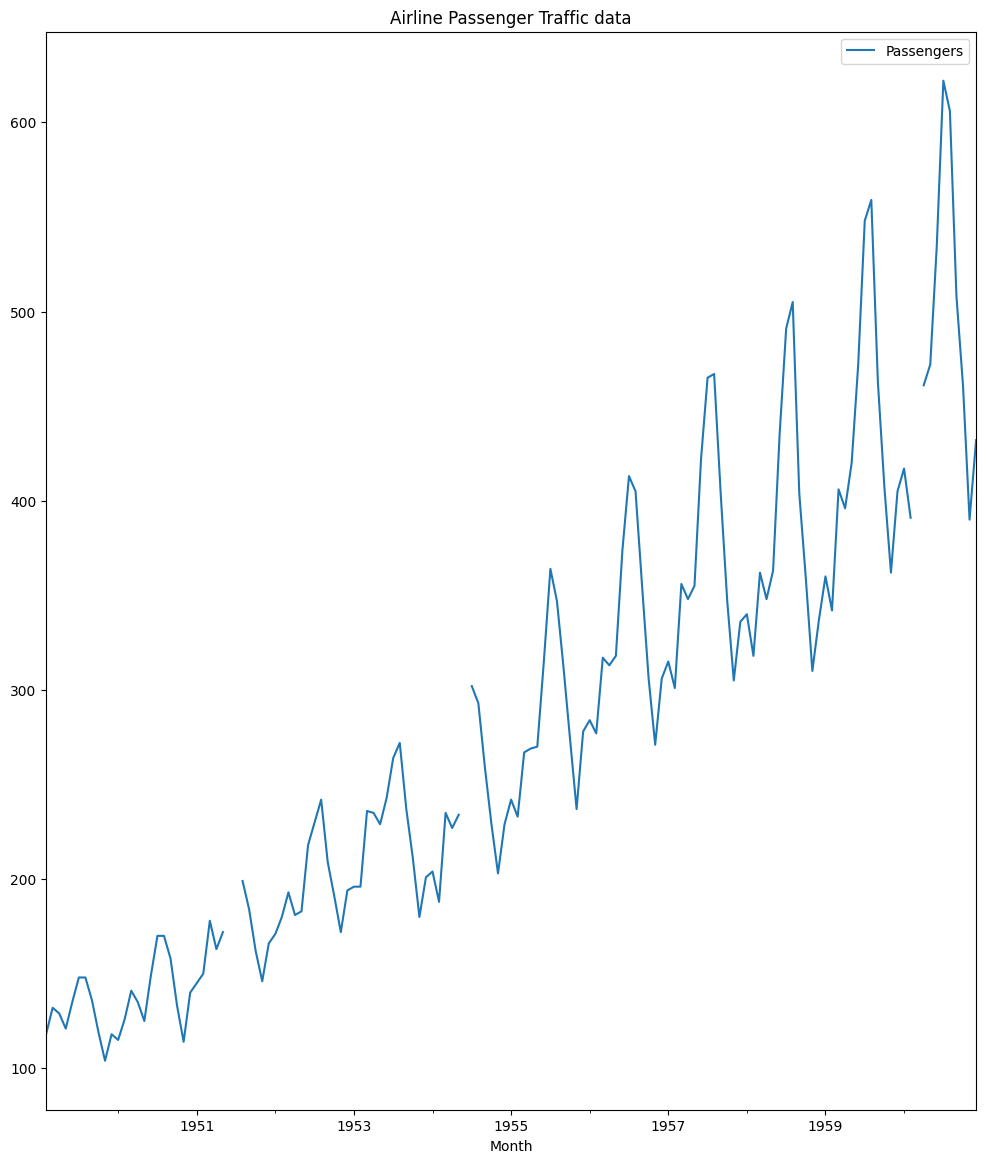

In [3]:
data.plot(figsize=(12,14))
plt.legend(loc ='best')
plt.title('Airline Passenger Traffic data')
plt.show(block=False)

# Missing Values

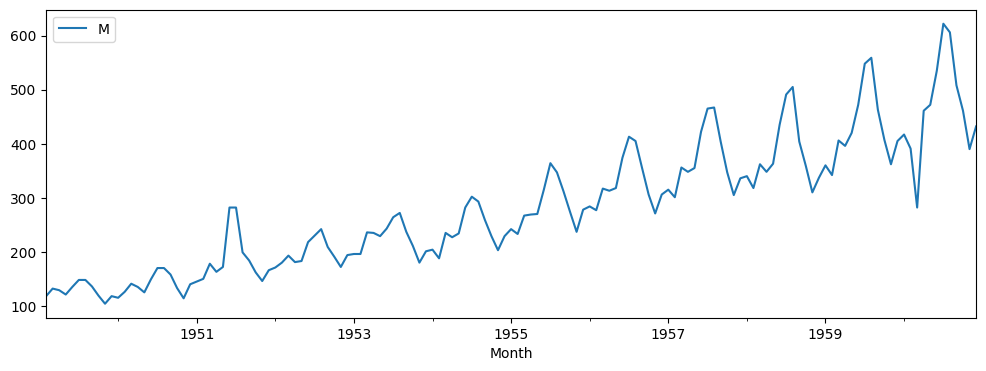

In [4]:
### Mean imputatation
data = data.assign(Passengers_Mean_Imputation = data.Passengers.fillna(data.Passengers.mean()))
data[['Passengers_Mean_Imputation']].plot(figsize=(12,4))
plt.legend('Missing Value: Mean imputation')
plt.show(block=False)

## Using Linear Interpolation

Text(0.5, 1.0, 'Missing value treatment : Linear interpolation')

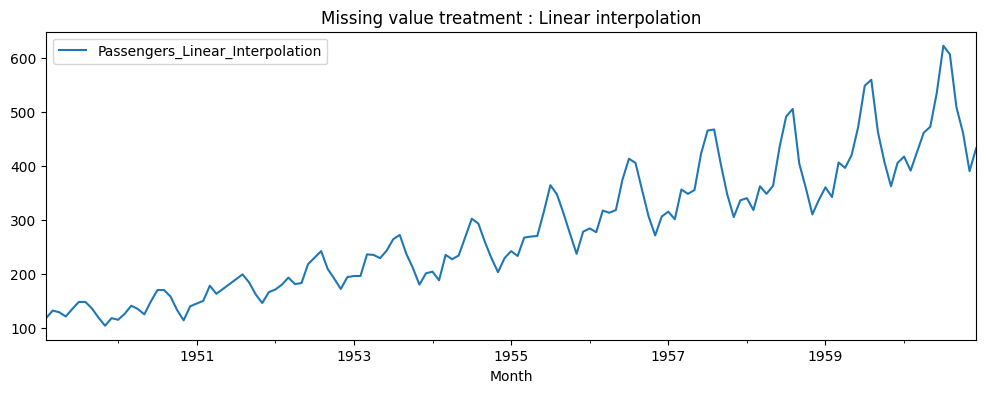

In [5]:
data = data.assign(Passengers_Linear_Interpolation =data.Passengers.interpolate(method='linear'))
data[['Passengers_Linear_Interpolation']].plot(figsize=(12,4))
# draws a line btw prev and next point and then takes the avg explantaion of linear Interpolation
plt.legend(loc ='best')
plt.title('Missing value treatment : Linear interpolation')

In [6]:
# Using linear Interpolation
data['Passengers'] = data['Passengers_Linear_Interpolation']

#### outlier detection

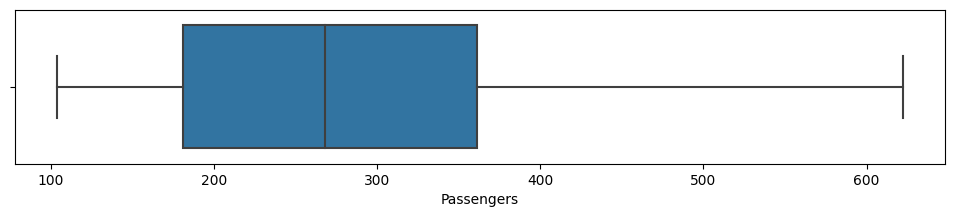

In [7]:
import seaborn as sns
fig = plt.subplots(figsize = (12,2))
ax = sns.boxplot(x =data['Passengers'],whis = 1.5)

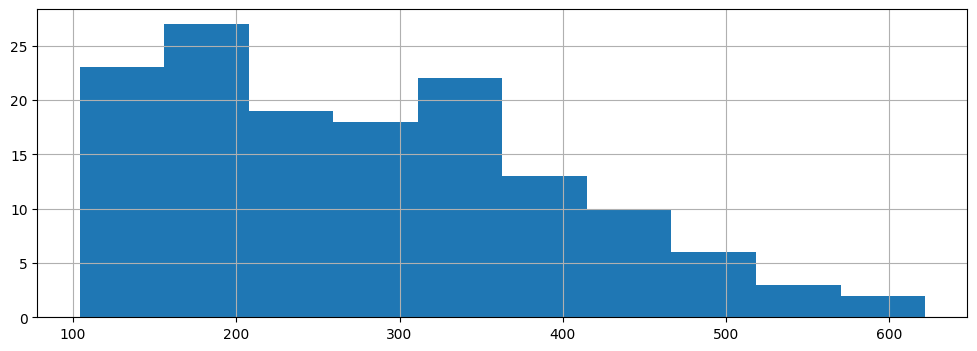

In [8]:
# histogram
fig = data.Passengers.hist(figsize=(12,4))

#### From the above 3 it is evedent that there are no outliers (time series,histogram,boxplot)

### <r>TIME SERIES DECOMPOSTION <r/>

In [9]:
from pylab import rcParams
import statsmodels.api as sm

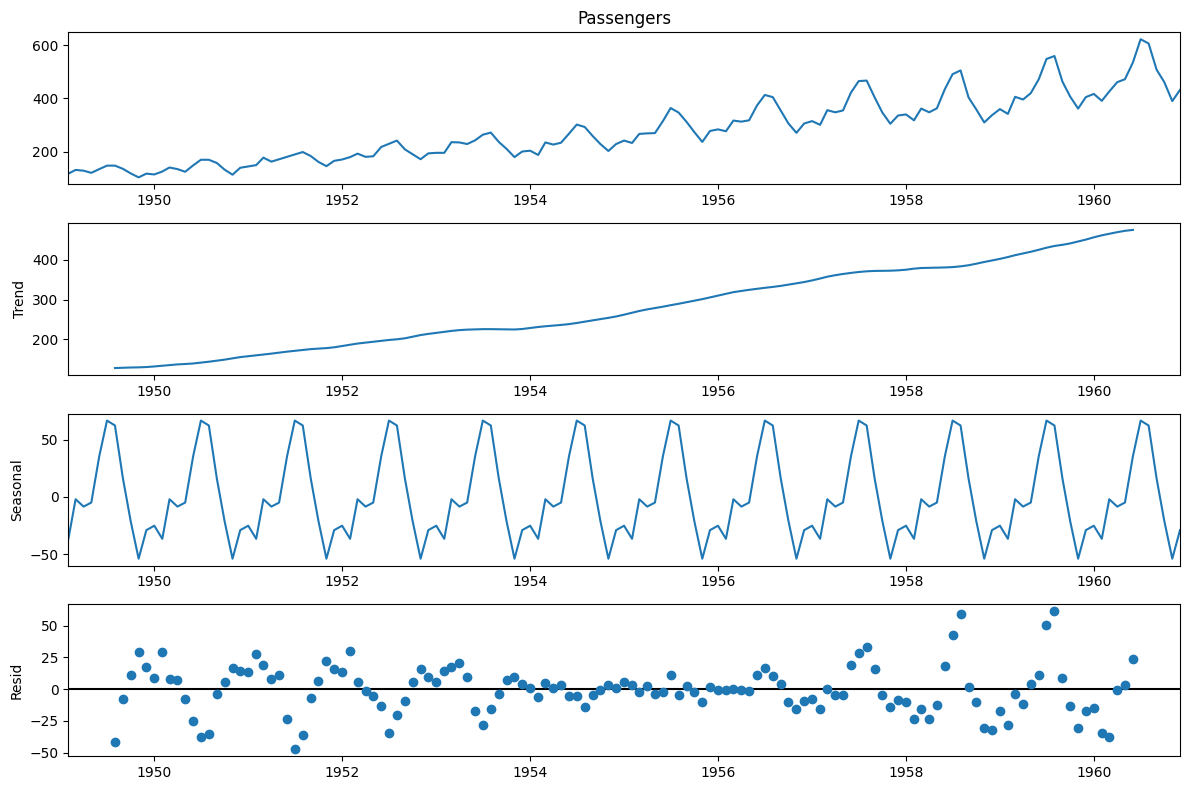

In [10]:
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers,model='additive')
fig = decomposition.plot()
plt.show()

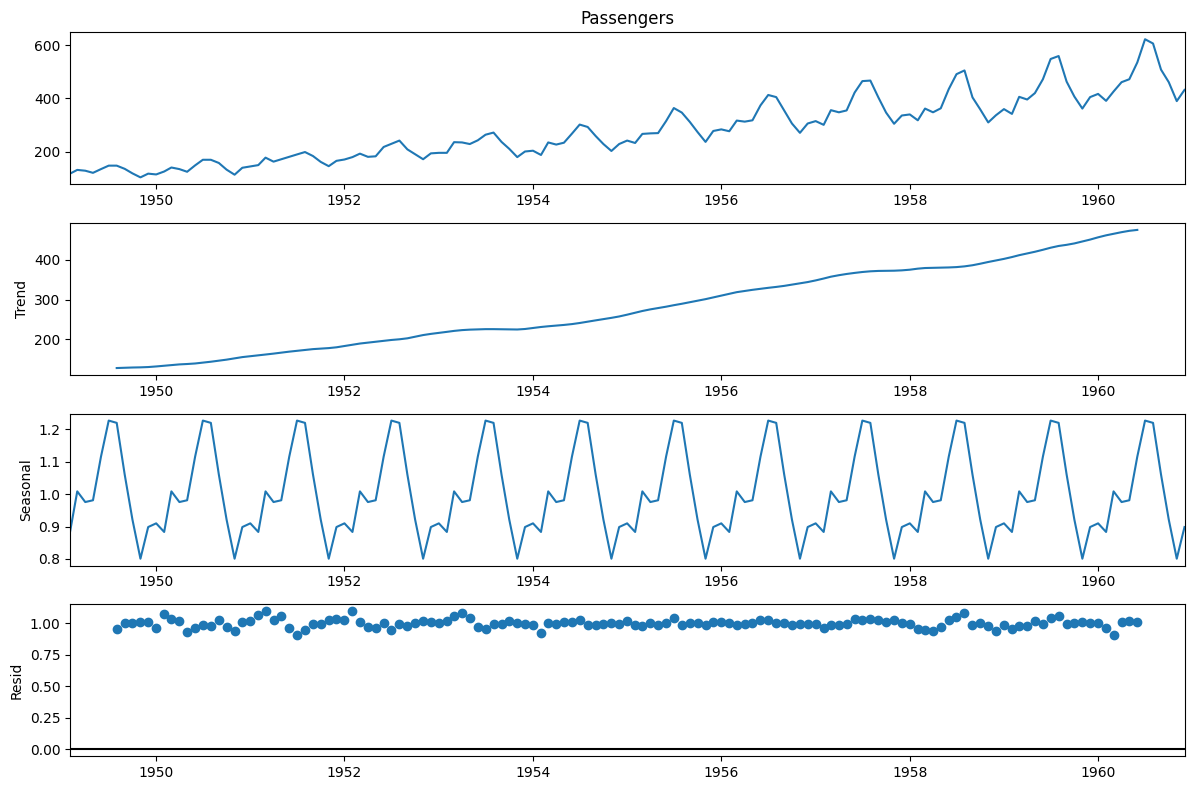

In [11]:
# Multiplicative seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(data.Passengers,model='multiplicative')
fig = decomposition.plot()
plt.show()

### Build and evaluate time series forcast

In [12]:
train_len = 120
train = data[0:train_len]
test = data[train_len:]

#### Naive method

In [13]:
y_hat_naive = test.copy()
y_hat_naive['naive_forcast'] = train['Passengers'][train_len -1]

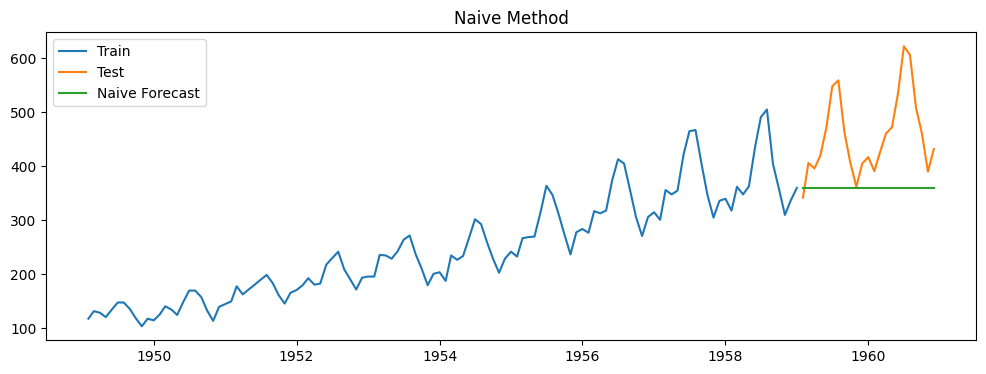

In [14]:
# Plot train
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label = 'Train')
plt.plot(test['Passengers'],label = 'Test')
plt.plot(y_hat_naive['naive_forcast'],label = 'Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

## Sime average method

In [15]:
y_hat_avg = test.copy()
y_hat_avg['avg_forcast'] = train['Passengers'].mean()

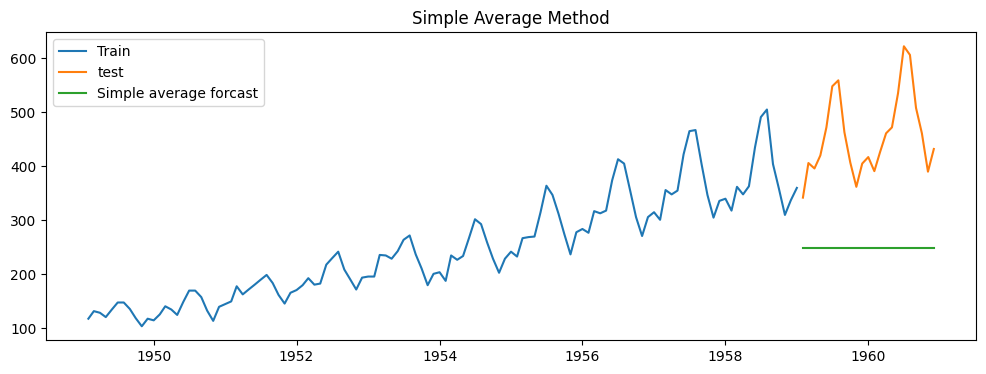

In [16]:
# Plot
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label ='Train')
plt.plot(test['Passengers'],label = 'test')
plt.plot(y_hat_avg['avg_forcast'],label = 'Simple average forcast')
plt.legend(loc = 'best')
plt.title('Simple Average Method')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_naive['naive_forcast'])).round(2)

mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forcast'])/test['Passengers'])*100)

results = pd.DataFrame({'Method':['Naive method'],'MAPE' : [mape], 'RMSE':[rmse]})
results =results[['Method','RMSE','MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.4,20.0


In [18]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_avg['avg_forcast'])).round(2)

mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_avg['avg_forcast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Average method'],'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Naive method,121.4,20.00
0,Simple Average method,221.2,44.36


## Simple Moving Average

In [27]:
y_hat_sma = data.copy()
# to that we can forcast over the train as well as the test period
ma_window = 12
y_hat_sma['sma_forcast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forcast'][train_len:] = y_hat_sma['sma_forcast'][train_len-1]
# to enable no new data to be present in case of test data

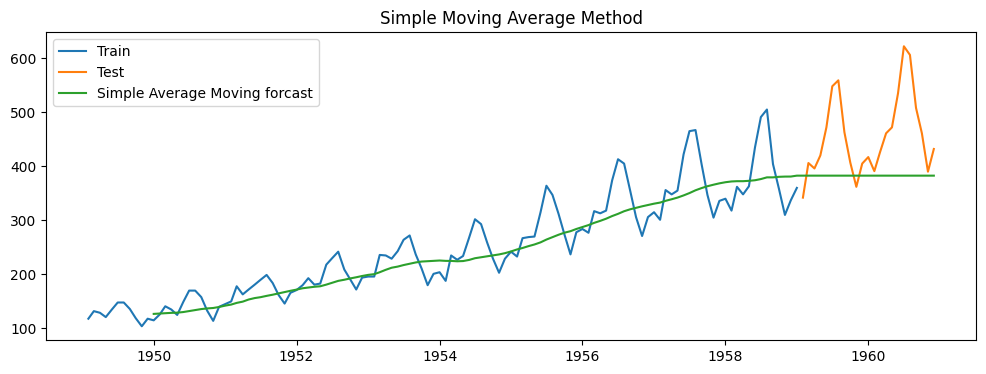

In [28]:
### plot train test and forcast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'],label = 'Test')
plt.plot(y_hat_sma['sma_forcast'],label ='Simple Average Moving forcast')
plt.legend(loc ='best')
plt.title('Simple Moving Average Method')
plt.show() 

## Calculate RMSE and MAPE for SMA

In [40]:
# rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sma['sma_forcast'][train_len])).round(2)
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forcast'][train_len:])).round(2)

In [31]:
train_len

120